In [3]:
import ml
import parse_lipidblast as pl
import numpy as np
%matplotlib inline

In [294]:
def plot_PCA(X, y_data):
    from sklearn.decomposition import PCA
    pca = PCA(n_components=50)
    vis_data = pca.fit_transform(X)
    do_plot(vis_data[:, 0] , vis_data[:, 1], y_data, colours)

In [299]:
def plot_LLE(X, y_data, n_neighbours = 100):
    from sklearn import manifold
    vis_data, err = manifold.locally_linear_embedding(X, n_neighbours, n_components=2)
    print("Reconstruction error: %g" % err)
    do_plot(vis_data[:, 0], vis_data[:, 1], y_data, colours)

In [288]:
def do_plot(vis_x, vis_y, y_data, colours):
    from collections import OrderedDict
    import matplotlib as mpl
    import matplotlib.pyplot as plt
    colours = convert_to_colours(y_data)
    plt.figure(figsize=(20,20))
    for i in range(len(vis_x)):
        plt.scatter(vis_x[i], vis_y[i], label=y_data[i], c=colours[i], cmap='RdYlGn')
    
    # remove duplicate labels
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.show()

In [186]:
# not implemented, because too many labels otherwise
def plt_annotate():
    for label, x, y in zip(y_data, vis_x, vis_y):
        plt.annotate(
            label, 
            xy = (x, y), xytext = (-20, 20),
            textcoords = 'offset points', ha = 'right', va = 'bottom',
            bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
            arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

In [6]:
def get_compounds():
    compounds = pl.parse_all(open('combined.txt').read())
    np.random.seed(0)
    compounds_noisy = ml.add_gauss_noise(compounds, sigma=5e-6)
    return compounds_noisy

In [56]:
def sample_compounds(compounds, p): #p ... 0 to 1
    # max value for 4gb: 0.03
    import random
    return random.sample(compounds, int(len(compounds)*p))

In [239]:
X, y, _, labels = ml.fs_round(sample_compounds(get_compounds(), 0.004), sparse=False)
print X.shape

(851, 3831)


In [277]:
def convert_to_colours(data):
    import matplotlib.pyplot as plt
    norm = plt.Normalize()
    colours = np.array(y)
    labels = np.unique(y)
    counter = 0
    for label in labels:
        counter += 1
        for i in range(len(colours)):
            if colours[i] == label:
                colours[i] = float(counter)/len(labels)
    return plt.cm.jet(norm(colours))

(851, 3831)


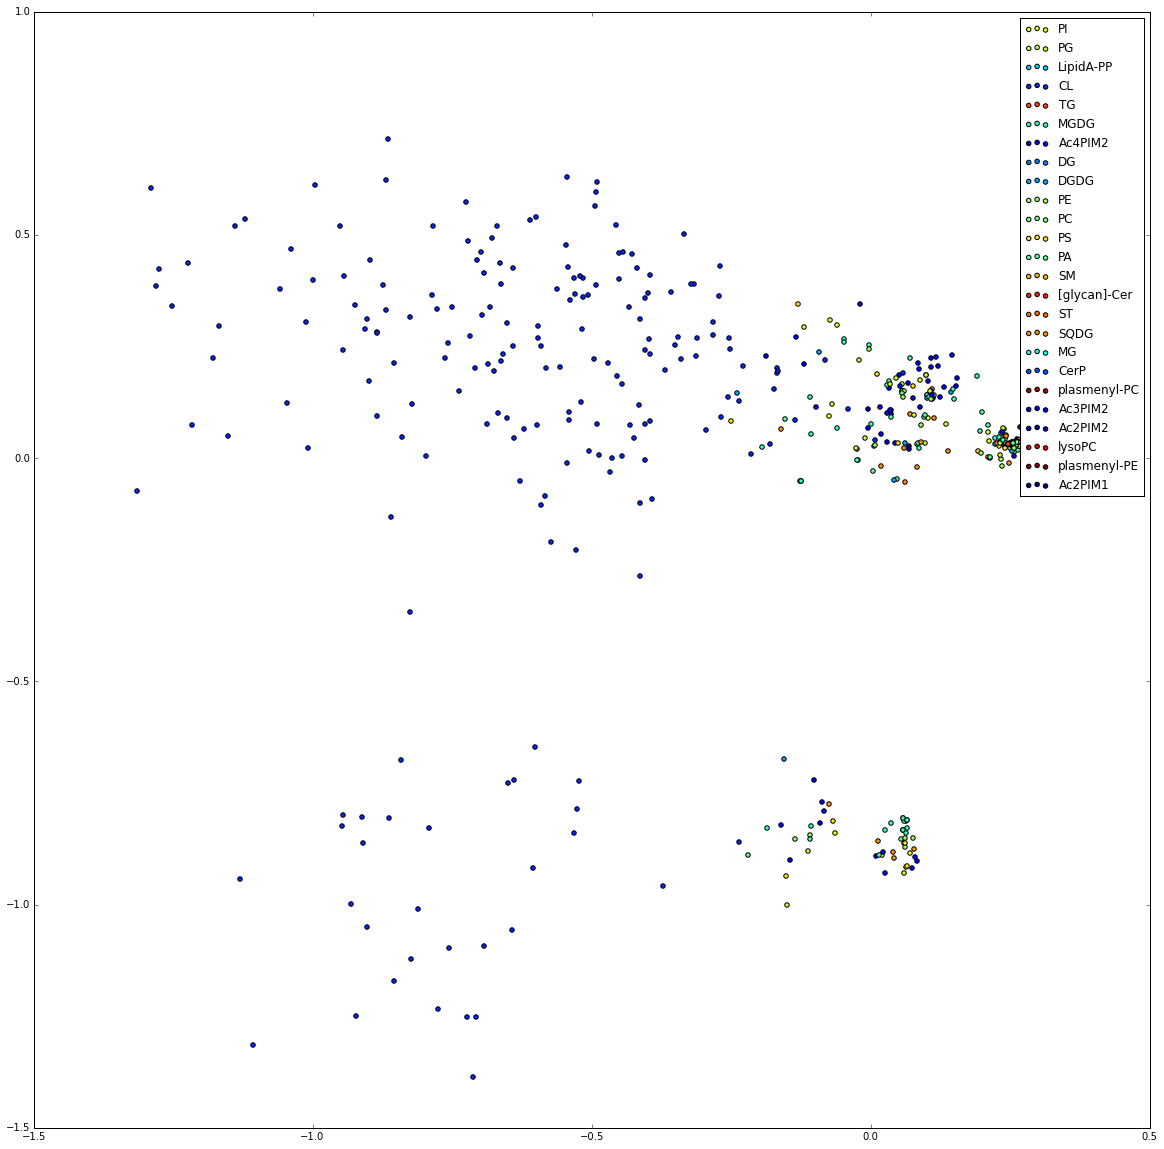

In [295]:
print X.shape
plot_PCA(X,y)

Reconstruction error: 0.00381121


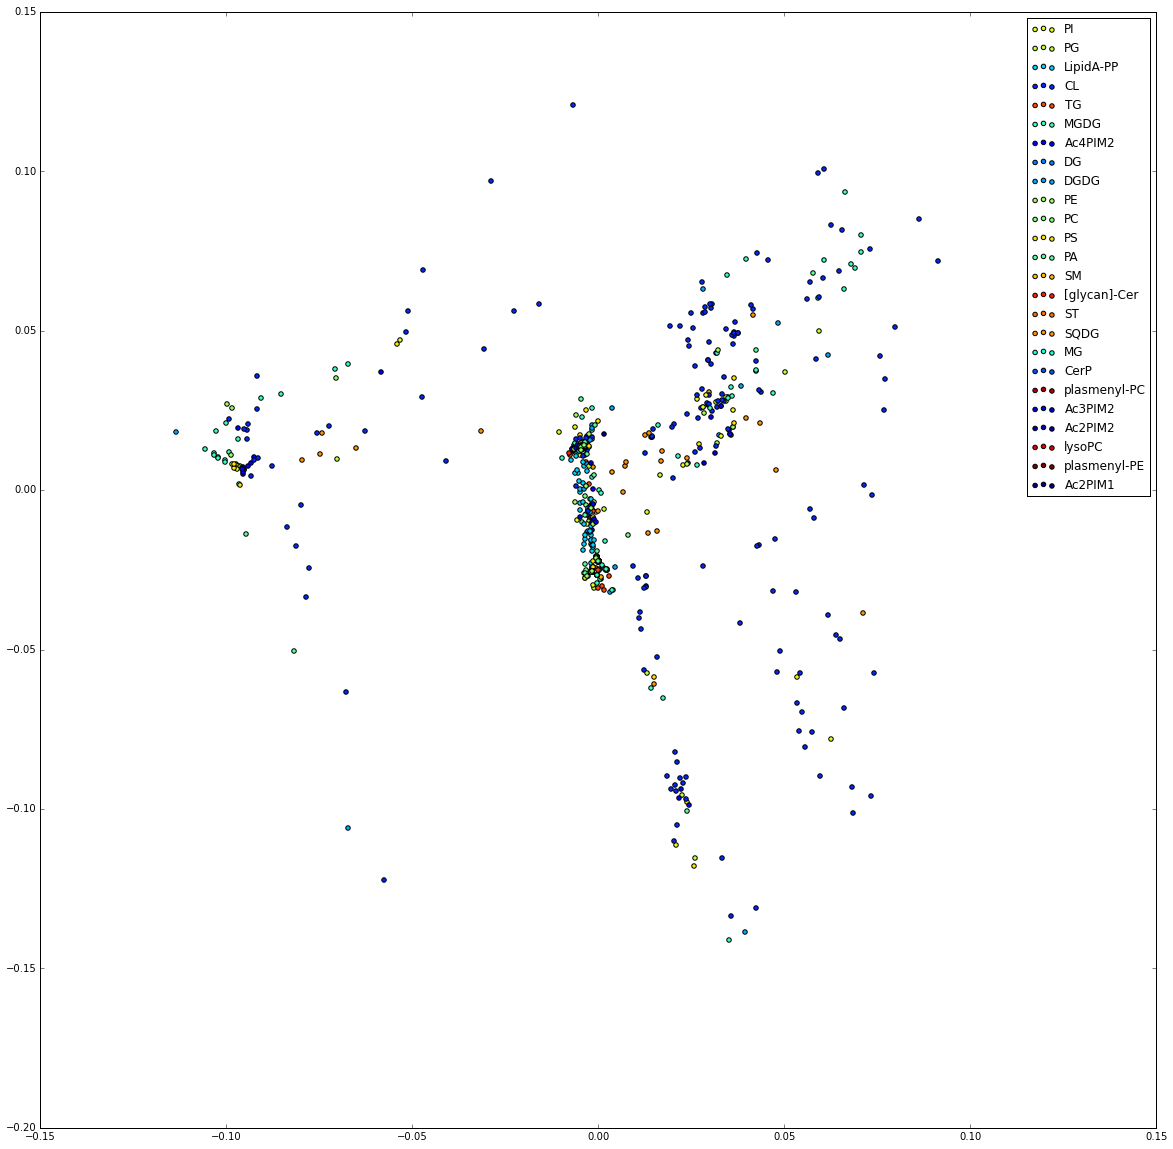

In [300]:
plot_LLE(X,y, n_neighbours=30)